In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature.texture as ski
import math

In [67]:
#get the neighbours in a list by moving clockwise
def getNeighbours(pointCoord):
    neighboursCoord = []
    '''
    get the neighbours starting from the top-left clockwise
    '''
    #append the top neighbours moving from left to right
    for j in range(0,3):
        neighboursCoord.append([pointCoord[0] - 1,j])
    #append the right neighbour
    neighboursCoord.append([pointCoord[0],pointCoord[1] + 1])
    #append the bottom neighbours moving from right to left
    for j in range(2,-1,-1):
        neighboursCoord.append([pointCoord[0] + 1,j])
    #append the left neighbour
    neighboursCoord.append([pointCoord[0],pointCoord[1] - 1])
    return neighboursCoord


def CSP_LP(neighbours,N,Threshold):
    #get the accumlating of csp_lp from the neighbours
    CSP_LP_SUM = 0
    #loop on all neighbours
    for i in range(0,int(N/2)):
        #substract each neighbour and its peer
        s = neighbours[i] - neighbours[i + int(N/2)]
        #check if s is greater than the given threshold
        if(s > Threshold):
            #if the condition is satisfied then add pow(2,i) to csp_lp sum
            CSP_LP_SUM += (2**i)
    return CSP_LP_SUM

'''
Testing phase
'''
pixels = [
    [0.5,0.9,0.6],
    [0.8,-0.2,0.7],
    [0.10,0.88,0.5]
]
neighbours = []
neighboursCoord = getNeighbours([1,1])
for i in neighboursCoord:
    x = i[0]
    y = i[1]
    neighbours.append(pixels[x][y])
CSP_LP_SUM = CSP_LP(neighbours,8,0.01)
print(CSP_LP_SUM)
CSP_LP_Matrix = [
    [9,15,2,15],
    [9,10,2,6],
    [0,15,2,6],
    [9,15,2,6]
]
GLCM = ski.greycomatrix(CSP_LP_Matrix,distances=[2],angles=[0,math.pi/4,
                                                    math.pi/2,math.pi*(5/4)],levels=16)
#print(GLCM[:,:,0,3])
featureVector = []
for k in range(GLCM.shape[3]):
    for i in range(GLCM.shape[0]):
        for j in range(GLCM.shape[1]):
            featureVector.append(GLCM[i][j][0][k])
#print(len(featureVector))
#print(featureVector)

6


(3542, 2479)


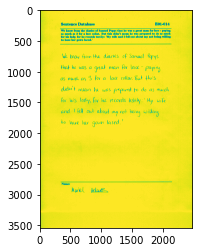

In [11]:
#read the image and convert to normalized grayscale
img = np.array(cv2.imread("e01-014.png",0)/255)
print(img.shape)
plt.imshow(img)